### Sea x una variable aleatoria uniforme en el rango [0,1] e y = x^2 . (2 pts total)       
(a) Son x e y independientes? (0.5 pto)      
la probabilidad conjunta P(x, y) es igual al producto de las probabilidades marginales P(x) y P(y). En este caso, x e y no son independientes porque y es una función de x. Por lo tanto, P(x, y) ≠ P(x) * P(y).    
(b) Genera un set de ݊ = 10000 datos para x e y (0.5 pto).       
  

In [2]:
import numpy as np

x = np.random.rand(10000)
y = x**2


(c) Grafica scatterplot de x e y (0.5 pto)

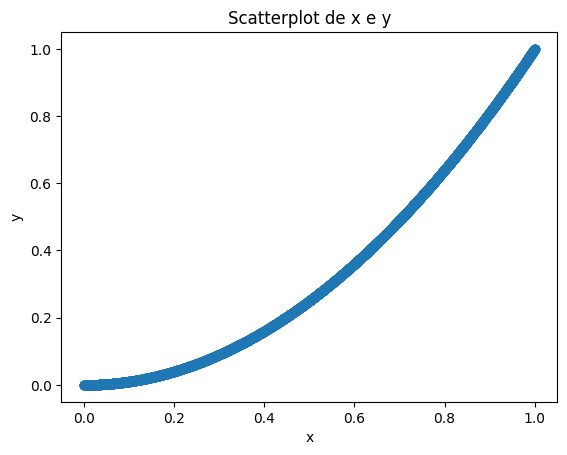

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x, y, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot de x e y')
plt.show()

(d) Calcula cov(x,y) y comenta sobre el resultado. (0.5 pts)
La covarianza mide la relacion lineal entre variables, al ser este un caso no lineal la covarianza no es una medida muy representativa

In [4]:
covariance = np.cov(x, y)[0, 1]
print("Covarianza entre x e y:", covariance)

Covarianza entre x e y: 0.08365166967566622


### Sea $x = (x1,x2,...,xp)^T$ un vector de p variables aleatorias independientes con las funciones de distribuciones marginales Fx1(x1),Fx2(x2),...Fxp(xp). (1 pto total)      
(a) Encuentra la función de distribución conjunta F(x1,x2,...,xp)? (0.5 pto)        
$F(x1,x2,...,xp)=Fx1(x1)∗Fx2(x2)∗...∗Fxp(xp)$       

(b) Encuentra la función de copula. (0.5 pto)       
$C(u1,u2,...,up)=F(Fx1(−1)(u1),Fx2(−1)(u2),...,Fxp(−1)(up))$        
$(u1,u2,...,up)=u1∗u2∗...∗up$       

### Considera datos muestrales (1 pts total)        
x = matrix([2,6,-3],[-4,8,7],[-2,9,7],[-7,8,2])     
de una distribucion normal N3 con media mu y desviacion estandar sigma desconocidos. Calcula:       
(a) El estimador de máxima verosimilitud de mu (0.5 pto)        
(b) El estimador de máxima verosimilitud de Σ (0.5 pto)     

In [6]:
import numpy as np

x = np.array([[2, 6, -3],
              [-4, 8, 7],
              [-2, 9, 7],
              [-7, 8, 2]])
n = x.shape[0]

mu_hat = np.mean(x, axis=0)

residuals = x - mu_hat
sigma_hat = (1 / n) * residuals.T @ residuals

print("Estimador MLE de mu:")
print(mu_hat)

print("\nEstimador MLE de Sigma:")
print(sigma_hat)


Estimador MLE de mu:
[-2.75  7.75  3.25]

Estimador MLE de Sigma:
[[10.6875 -2.1875 -6.5625]
 [-2.1875  1.1875  4.0625]
 [-6.5625  4.0625 17.1875]]


### sea x = [x1, x2] un vector aleatorio bivariado con función de distribución dada por:
$F(x1,x2) =  1/(1+exp(-x1)+exp(-x2))$       
donde X pertenece a R^2     
Encuentre funcion de cupula     

In [9]:
import numpy as np
from scipy.optimize import root_scalar

def joint_distribution(x1, x2):
    return 1 / (1 + np.exp(-x1) + np.exp(-x2))
def marginal_distribution_x1(x1):
    return root_scalar(lambda u: joint_distribution(x1, u) - u, bracket=[-10, 10]).root

def marginal_distribution_x2(x2):
    return root_scalar(lambda u: joint_distribution(u, x2) - u, bracket=[-10, 10]).root

u1 = 0.5  # Valor de u1
u2 = 0.3  # Valor de u2
x1_inverse = marginal_distribution_x1(u1)
x2_inverse = marginal_distribution_x2(u2)

copula_value = joint_distribution(x1_inverse, x2_inverse)

print(f"C(u1={u1}, u2={u2}) =", copula_value)


C(u1=0.5, u2=0.3) = 0.4347643985548188


### Sea x una variable aleatoria multivariada p=2 dimensional que sigue una distribución normal multivariada con la media y la covarianza desconocido. El vector de media y la matriz de covarianza muestrales para una muestra de tamaño n=10 están dados por (2 pts)
S = (210.54 126.99),(126.99 119.68)         
x barra = (55.24 34.97)         
Contrasta la hipótesis nula     
H0:  μ = (60, 50)   
Frente la hipótesis alternativa     
H1: μ ≠ (60, 50)        
con el nivel de significacion a = 0.05       

In [10]:
import numpy as np
from scipy.stats import f

n = 10
x_barra = np.array([55.24, 34.97])
mu_hipotesis_nula = np.array([60, 50])
S = np.array([[210.54, 126.99], [126.99, 119.68]])
p = 2  # Dimensionalidad del vector de medias
n_p = n - p  # Grados de libertad

# Cálculo del estadístico T^2 de Hotelling
T2 = (n-1) * np.dot(np.dot(x_barra - mu_hipotesis_nula, np.linalg.inv(S)), x_barra - mu_hipotesis_nula)
F = (n-p) / (p*(n-1)) * T2
alpha = 0.05
F_critico = f.ppf(1 - alpha, p, n_p)

print("Estadístico T^2:", T2)
print("Valor crítico de la distribución F de Hotelling:", F_critico)
if F > F_critico:
    print("Rechazamos la hipótesis nula H0")
else:
    print("No podemos rechazar la hipótesis nula H0")


Estadístico T^2: 31.851242233035986
Valor crítico de la distribución F de Hotelling: 4.458970107524511
Rechazamos la hipótesis nula H0


### Sea x una variable aleatoria multivariada p=2 dimensional que sigue una distribución normal multivariada con la media y la covarianza desconocido. La matriz de covarianza muestral para una muestra de tamaño n=100 está dado por (2 pts)

S = (1.6635 1.2410),(1.2410 1.3747)     
Contrasta la hipótesis nula        
H0:   Σ =  Σ0 = (1.2248 1.1425),(1.1425 1.5112)     
Frente la hipótesis alternativa     
H1: Σ ≠ Σ0      
con el nivel de significacion ܽa= 0.05       

In [7]:
import numpy as np
from scipy.stats import f


n = 100
p1 = 2
p2 = n - p1 - 1


S = np.array([[1.6635, 1.2410], [1.2410, 1.3747]])
Sigma0 = np.array([[1.2248, 1.1425], [1.1425, 1.5112]])


det_S = np.linalg.det(S)
det_Sigma0 = np.linalg.det(Sigma0)
F = (det_S / det_Sigma0) * (p2 / p1)

alpha = 0.05
F_critico = f.ppf(1 - alpha / 2, p1, p2)
if F > F_critico:
    print("Rechazar H0. Hay evidencia significativa de diferencia en las matrices de covarianza.")
else:
    print("No se puede rechazar H0. No hay evidencia significativa de diferencia en las matrices de covarianza.")


Rechazar H0. Hay evidencia significativa de diferencia en las matrices de covarianza.
